In [ ]:
# import library
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# READ DATASET

In this case study we collect dataset from Dqlab https://storage.googleapis.com/dqlab-dataset/customer_segments.txt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/Project/SOSMED DIGITAL/Data Scientist/Clustering/'

In [ ]:
os.listdir(path)

['K-Means Basic.ipynb', 'customer_segments.txt', 'K-Means Fundemental.ipynb']

In [ ]:
# Load data
customer_data = pd.read_csv(os.path.join(path, "customer_segments.txt"), sep="\t")
customer_data.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


Here is the meaning of column in english :<br>
Customer_ID,Customer Name,Gender,Age,Profession,Residence Type, Annual Spending

In [ ]:
# Categorical Data
categorical = ["Jenis Kelamin", "Profesi", "Tipe Residen"]
df_categorical = customer_data[categorical]
df_categorical.head()

,Jenis Kelamin,Profesi,Tipe Residen
0,Pria,Wiraswasta,Sector
1,Wanita,Pelajar,Cluster
2,Pria,Professional,Cluster
3,Pria,Professional,Cluster
4,Wanita,Wiraswasta,Cluster


# EDA

Exploratory Data Analysis (EDA) is the process of exploring data to understand its content and components.

What is the current distribution of customer ages?
To find out the distribution of customer ages, you can visualize it with a boxplot

<Axes: ylabel='Umur'>

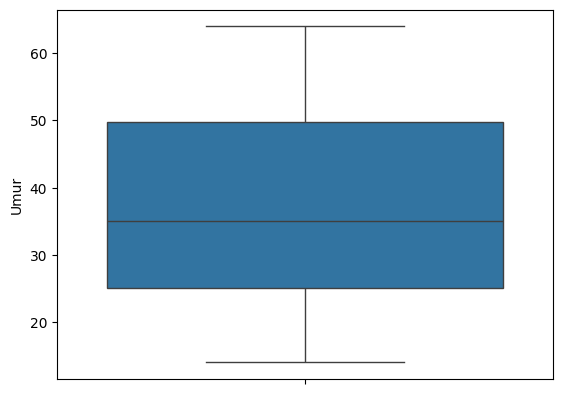

In [ ]:
sns.boxplot(customer_data["Umur"])

From the visualization above, it is known that the distribution of customer ages ranges from < 20 years to > 60 years.<br><br>

What is the proportion of customer ages?<br>
To determine the age proportion of customers, we will divide the customers into age groups. In this case, we will group customers into 10-year age ranges.

In [ ]:
# Assuming customer_data is your DataFrame containing the data

# Define age groups
age25below = customer_data['Umur'][(customer_data['Umur'] <= 25) & (customer_data['Umur'] >= 12)]
age26_35 = customer_data['Umur'][(customer_data['Umur'] <= 35) & (customer_data['Umur'] >= 26)]
age36_45 = customer_data['Umur'][(customer_data['Umur'] <= 45) & (customer_data['Umur'] >= 36)]
age46_55 = customer_data['Umur'][(customer_data['Umur'] <= 55) & (customer_data['Umur'] >= 46)]
age55above = customer_data['Umur'][customer_data['Umur'] >= 56]

x = ["12-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age25below.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Define the data for the bar plot
bar_data = go.Bar(x=x, y=y, marker_color='#FFA500')  # 'orange' color using hexadecimal code

# Create the figure and add the bar data
fig = go.Figure()
fig.add_trace(bar_data)
# Show plot
fig.show()


From the image above, it is evident that the age group with the highest proportion of customers is in the range of less than or equal to 25 years, followed by the age ranges of 26-35 and 46-55 years.

**Now, what about the distribution of total annual spending?**
Perform the same steps as before to determine the distribution of total spending by customers.

In [ ]:
# Create a box plot
fig = go.Figure()
fig.add_trace(go.Box(y=customer_data["NilaiBelanjaSetahun"], boxmean='sd', marker_color='rgb(31, 119, 180)'))  # 'rgb(31, 119, 180)' is for the color 'blue'

# Update layout
fig.update_layout(
    title="Box Plot of NilaiBelanjaSetahun",
    yaxis=dict(title='Nilai Belanja Setahun'),
    plot_bgcolor='rgba(0,0,0,0)'
)

# Show plot
fig.show()

**How is the condition of gender, profession, and residence type?**
Below, bar charts will be used to determine the proportions of each variable in the data.

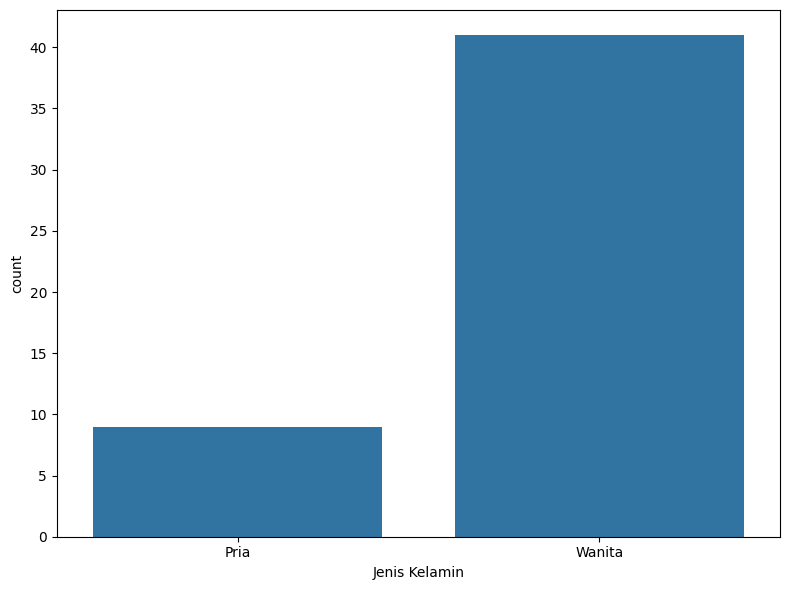

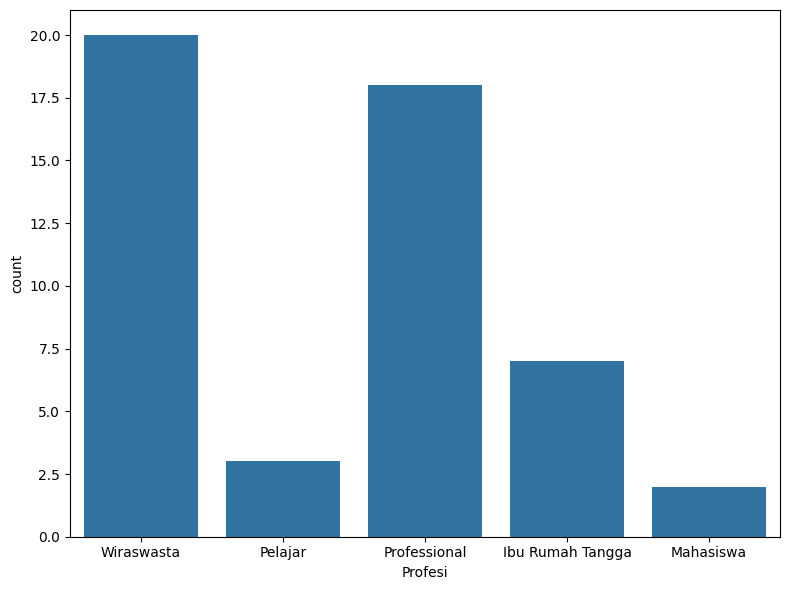

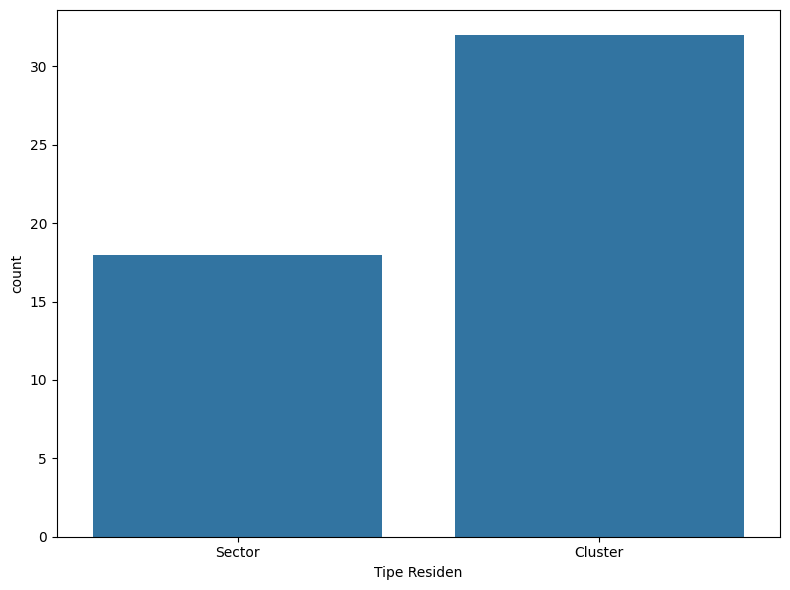

In [ ]:
for col in categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=customer_data)
    plt.tight_layout()

Currently, the majority of customers are female, with the dominating profession being self-employed (entrepreneurs), while the most recorded residence type is clustered residence type.

# DATA PRE-PROCESSING

# Encode Categorical


Data processing is a type of processing that can transform data into usable information for a case study. In Machine Learning, you cannot directly execute data that is in string format; therefore, it is necessary to transform the data from string into numeric form. In Python, there are libraries that support this issue, one of which is using the LabelEncoder() method.

In [ ]:
# Transforming categorical data into numeric
label_encoder = LabelEncoder()
encoded_data = customer_data[categorical].apply(label_encoder.fit_transform)

# Combining age and annual spending columns with categorical data
cluster_data = pd.concat([encoded_data, customer_data[["Umur", "NilaiBelanjaSetahun"]]], axis=1)

cluster_data.head()


,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,58,9497927
1,1,2,0,14,2722700
2,0,3,0,48,5286429
3,0,3,0,53,5204498
4,1,4,0,41,10615206


# FEATURE ENGINEERING

## Feature Selection
In clustering, it's important to understand the relationship between each variable. This will assist you in determining which features to use. One way to explore this is by analyzing the correlation between each variable.

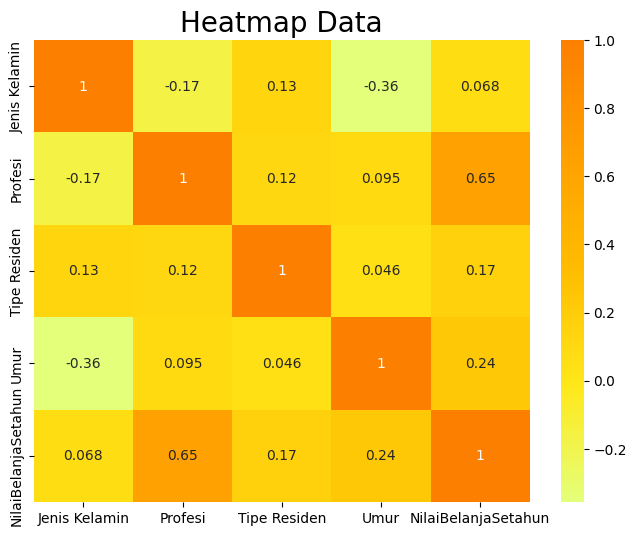

In [ ]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

From the heatmap above, it is observed that the highest correlation is between the variables "Annual Spending" and "Profession", followed by "Annual Spending" and "Age", although the correlation value is relatively low. Therefore, for further analysis, two variables will be used to determine clusters in the data: "Profession" and "Annual Spending"

In [ ]:
# Drop Unnecessary Variables
cluster_data = cluster_data.drop(["Jenis Kelamin",
                                  "Tipe Residen", "Umur"], axis = 1)
cluster_data.head()

,Profesi,NilaiBelanjaSetahun
0,4,9497927
1,2,2722700
2,3,5286429
3,3,5204498
4,4,10615206


## Scaling Data
In clustering, scaling the data is also necessary to address the issue of gaps in each column. Scaling ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating the clustering process.

In [ ]:
# Data Scaling
scaler = StandardScaler()
cluster_data[["Profesi", "NilaiBelanjaSetahun"]] = scaler.fit_transform(cluster_data[["Profesi", "NilaiBelanjaSetahun"]])
cluster_data.head()

,Profesi,NilaiBelanjaSetahun
0,0.851837,0.946763
1,-0.616847,-1.695081
2,0.117495,-0.695414
3,0.117495,-0.727361
4,0.851837,1.382421


# MODELING


If you already know the number of clusters you expect, you can directly specify the number of clusters in the modeling process as shown below

In [ ]:
cluster = KMeans(n_clusters=2)
cluster.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
pd.concat([customer_data, segment], axis=1)

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,0
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,0
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,0
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,0
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,0
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,0
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,0


##Determining the optimal value of K (number of clusters)
using the Elbow Method is a technique used to provide information in determining the best number of clusters by examining the percentage comparison of the cluster numbers that will form an elbow at a certain point. This determination is based on the characteristics of the data you have.

In [ ]:
Sum_of_squared_error = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

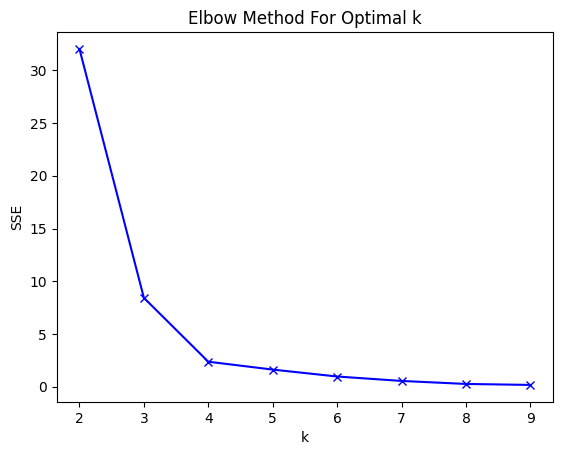

In [ ]:
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the elbow method, at the elbow points, we obtained either k=3 or k=4. In applying the elbow method, the optimal k selection is made when the distance between one number and another does not differ significantly. In this case, the optimal value of k is 4 because the distance between 2 and 3 is too far. However, to ensure this, it will be evaluated using the silhouette score.

In [ ]:
print(cluster.cluster_centers_)
#This will print the centroid values for each cluster generated by the KMeans algorithm.

[[-0.56789105 -0.76406183]
 [ 0.85183657  1.14609274]]


## Model Evaluation
Using silhouette score to confirm k-clusters.

In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

For n_clusters = 2, silhouette score is 0.681979195097331
For n_clusters = 3, silhouette score is 0.785057992924231
For n_clusters = 4, silhouette score is 0.8491952909238699
For n_clusters = 5, silhouette score is 0.7719536764512731
For n_clusters = 6, silhouette score is 0.7912853388219153
For n_clusters = 7, silhouette score is 0.7773599784790521
For n_clusters = 8, silhouette score is 0.7964226316706623


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 9, silhouette score is 0.7743380058769962



From the silhouette model, the optimum number of clusters is found to be 4, which is the same as the cluster selection using the elbow method. Therefore, moving forward, we will use k=4, meaning customers will be divided into 4 groups.

In [ ]:
cluster = KMeans(n_clusters=4)
cluster.fit(cluster_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [ ]:
segment = pd.Series(cluster.labels_, name="segment")

In [ ]:
results = pd.concat([customer_data, segment], axis=1)
results.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,segment
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,3
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,0
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,0
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,1


##Exploratory Data Analysis (EDA)
Next, after determining customer segmentation, an analysis will be conducted on each cluster. What are the characteristics of cluster 0, cluster 1, cluster 2, and cluster 3?

**How is the distribution of age in each cluster?**

<Axes: xlabel='segment', ylabel='Umur'>

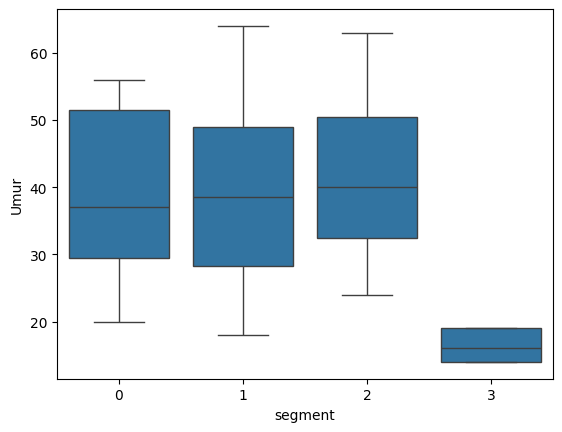

In [ ]:
sns.boxplot(x=results["segment"], y=results["Umur"], data=results)

From the age distribution, it's observed that the most notable difference is in cluster 3, where the age range is < 20 years, indicating that it consists of young individuals. Meanwhile, the most varied age range is in cluster 0, while the other two clusters are relatively similar, consisting of adults to elderly individuals.

**Now, how about the distribution of professions in each cluster?**

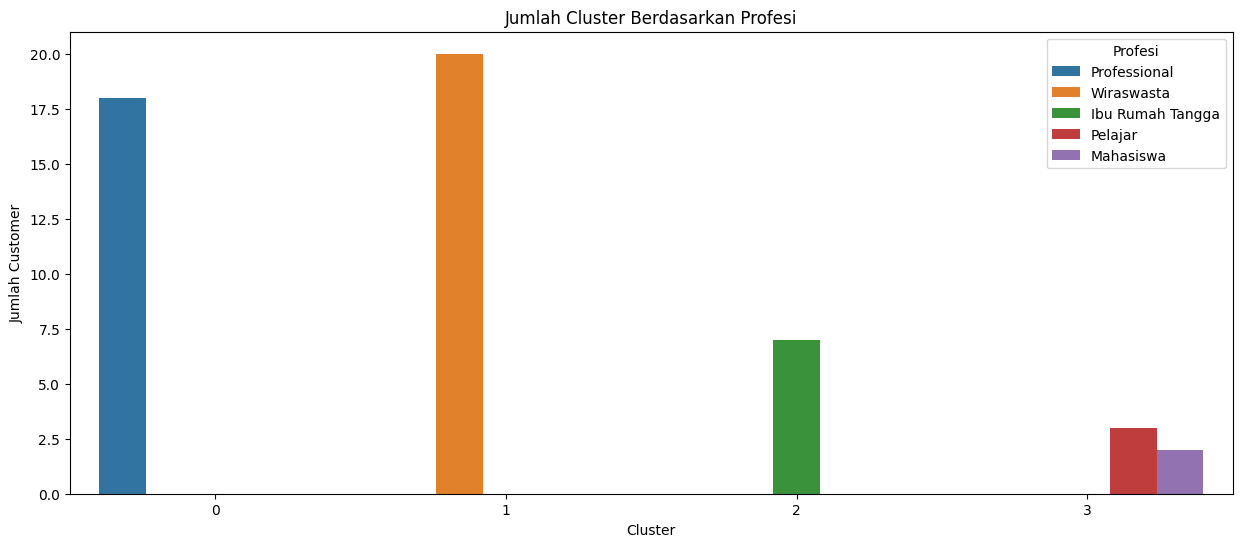

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=results, hue="Profesi")
plt.title("Jumlah Cluster Berdasarkan Profesi")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

**Visualization of the relationship between Annual Spending and Age**

<Axes: xlabel='Umur', ylabel='NilaiBelanjaSetahun'>

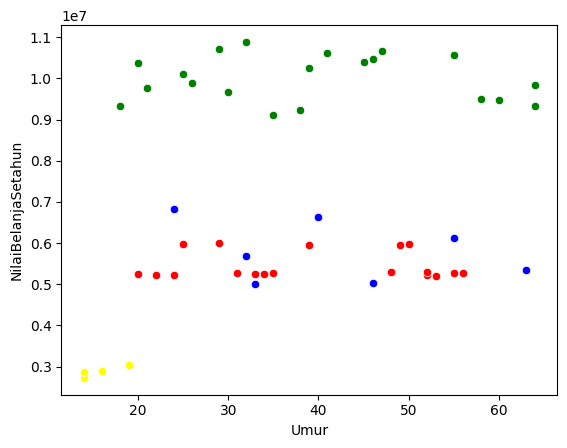

In [ ]:
sns.scatterplot(x=results[results["segment"]==0].Umur, y=results[results["segment"]==0].NilaiBelanjaSetahun, color="red")
sns.scatterplot(x=results[results["segment"]==1].Umur, y=results[results["segment"]==1].NilaiBelanjaSetahun, color="green")
sns.scatterplot(x=results[results["segment"]==2].Umur, y=results[results["segment"]==2].NilaiBelanjaSetahun, color="blue")
sns.scatterplot(x=results[results["segment"]==3].Umur, y=results[results["segment"]==3].NilaiBelanjaSetahun, color="yellow")

#Evaluate Clusters Result

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
results.drop(['segment'], axis = 1, inplace = True)

In [ ]:
len(segment)

50

In [ ]:
print(davies_bouldin_score(results[["NilaiBelanjaSetahun"]], segment))

1.427444018808372


The function davies_bouldin_score is a metric used to evaluate the quality of clustering algorithms. It calculates the Davies-Bouldin index, which measures the average similarity between each cluster and its most similar cluster, where a lower value indicates better clustering.

In your code snippet, results[["NilaiBelanjaSetahun"]] seems to be the data used for clustering, and segment is likely the cluster labels obtained from the clustering algorithm.

The resulting Davies-Bouldin score of approximately 1.427 indicates the average similarity between clusters. Lower scores typically indicate better separation between clusters, suggesting that the clustering algorithm has effectively separated the data points into distinct groups based on their annual spending.

Overall, a Davies-Bouldin score of 1.427 suggests reasonable clustering performance, but it's essential to interpret this score in the context of your specific dataset and objectives.